In [1]:
num_NN = 100
num_epochs = 100
b_size = 32

In [2]:
# Get FASHION-MNIST data
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# data reshaping
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

# data normalization
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [3]:
# One-hot encoding of the label
from keras.utils import to_categorical
num_classes = 10
y_train_dummy = to_categorical(y_train,num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

In [4]:
import numpy as np
import pandas as pd
from keras.models import load_model
from Ensemble_Lib import *


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [401]:
mean_sing_model_acc = np.zeros(num_NN-2)    # accuracy della singola rete media componente l'insieme
std_sing_model_acc = np.zeros(num_NN-2)     
mean_ens_acc = np.zeros(num_NN-2)           # accuracy dell'ensemble ottenuto con Unweighted Model Average
stacking_ens_acc = np.zeros(num_NN-2)       # accuracy dell'ensemble ottenuto con Stacking

num_NN = 20

# creazione di ensemble di nn reti
for nn in range(2,num_NN):
    model_dict = {}
    for i in range(nn):
        model_dict[i] = load_model('D:/TESI MAGISTRALE/Batch Shuffle 512/epoca1-50/Checkpoint/model_NN'+str(i)+'_ep50.hdf5')
    model_prediction = ModelsPrediction(X_train[48000:], model_dict, nn)
    model_prediction_arr = np.array(model_prediction)
    
    # creazione del training set per il meta-model ottenuto dalle predizioni delle reti componenti l'insieme sul validation set
    X_new = model_prediction_arr[0]
    for i in range(1,nn):
        X_new = np.concatenate((X_new, model_prediction_arr[i]),axis=1)
        
    # definizione e addestramento del meta-model
    model = Sequential([Dropout(0.2, input_dim=X_new.shape[1]),
                        Dense(100, activation='relu'),
                        Dropout(0.5),
                        Dense(num_classes, activation='softmax')])

    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

    model.fit(X_new, y_train_dummy[48000:], validation_split=0.1,epochs=num_epochs,
             batch_size=b_size, shuffle=True)
    
    model_prediction2 = ModelsPrediction(X_test, model_dict, nn)
    model_prediction_arr2 = np.array(model_prediction2)
    X_test_new = model_prediction_arr2[0]
    for i in range(1,nn):
        X_test_new = np.concatenate((X_test_new, model_prediction_arr2[i]),axis=1)
    stacking_ens_acc[nn-2] = model.evaluate(X_test_new, y_test_dummy)[1]
    models_acc = np.zeros(nn)
    for i in range(nn):
        models_acc[i] = (model_dict[i].evaluate(X_test,y_test_dummy)[1])
    mean_sing_model_acc[nn-2] = models_acc.mean()
    std_sing_model_acc[nn-2] = models_acc.std()
    
    ens_pred= EnsemblePrediction(X_test, model_prediction2, nn)
    mean_ens_acc[nn-2] = EnsembleAccuracy(X_test,y_test, ens_pred)
    
    
results = pd.DataFrame()
results['Epoca'] = [50 for i in range(num_NN-2)]
results['# NN'] = [i for i in range(2,num_NN)]
results['Mean Single Model Acc'] = mean_sing_model_acc
results['Std Single Model Acc'] = std_sing_model_acc
results['Mean Ensemble Acc'] = mean_ens_acc
results['Stacking Ensemble Acc'] = stacking_ens_acc

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

338/338 [==============================] - 0s 952us/step - loss: 0.6256 - accuracy: 0.8112 - val_loss: 0.4208 - val_accuracy: 0.8567
Epoch 32/100
338/338 [==============================] - 0s 923us/step - loss: 0.6015 - accuracy: 0.8189 - val_loss: 0.4206 - val_accuracy: 0.8575
Epoch 33/100
338/338 [==============================] - 0s 904us/step - loss: 0.5725 - accuracy: 0.8271 - val_loss: 0.4216 - val_accuracy: 0.8567
Epoch 34/100
338/338 [==============================] - 0s 918us/step - loss: 0.5851 - accuracy: 0.8226 - val_loss: 0.4212 - val_accuracy: 0.8575
Epoch 35/100
338/338 [==============================] - 0s 924us/step - loss: 0.6008 - accuracy: 0.8119 - val_loss: 0.4208 - val_accuracy: 0.8567
Epoch 36/100
338/338 [==============================] - 0s 925us/step - loss: 0.6057 - accuracy: 0.8117 - val_loss: 0.4204 - val_accuracy: 0.8567
Epoch 37/100
338/338 [==============================] - 0s 936us/step - loss: 0.6117 - accuracy: 0.8089 - val_loss: 0.4212 - val_accuracy

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
338/338 [==============================] - 1s 1ms/step - loss: 2.2143 - accuracy: 0.2382 - val_loss: 1.6543 - val_accuracy: 0.8175
Epoch 2/100
338/338 [==============================] - 0s 976us/step - loss: 1.5652 - accuracy: 0.7362 - val_loss: 1.0650 - val_accuracy: 0.8492
Epoch 3/100
338/338 [==============================] - 0s 945us/step - loss: 1.1136 - accuracy: 0.8054 - val_loss: 0.7310 - val_accuracy: 0.8558
Epoch 4/100
338/338 [==============================] - 0s 960us/step - loss: 0.8739 - accuracy: 0.8188 - val_loss: 0.5781 - val_accuracy: 0.8558
Epoch 5/100
338/338 [==============================] - 0s 940us/step - loss: 0.7770 - accuracy: 0.8215 - val_loss: 0.5072 -

Epoch 55/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.8386 - val_loss: 0.4163 - val_accuracy: 0.8583
Epoch 56/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.8407 - val_loss: 0.4162 - val_accuracy: 0.8575
Epoch 57/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.8419 - val_loss: 0.4160 - val_accuracy: 0.8575
Epoch 58/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5334 - accuracy: 0.8403 - val_loss: 0.4160 - val_accuracy: 0.8575
Epoch 59/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.8445 - val_loss: 0.4158 - val_accuracy: 0.8592
Epoch 60/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.8444 - val_loss: 0.4161 - val_accuracy: 0.8600
Epoch 61/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.8422 - val_loss: 0.4159 - val_accuracy:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8485
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Epoch 64/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5208 - accuracy: 0.8428 - val_loss: 0.4137 - val_accuracy: 0.8592
Epoch 65/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.8524 - val_loss: 0.4137 - val_accuracy: 0.8592
Epoch 66/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5220 - accuracy: 0.8394 - val_loss: 0.4131 - val_accuracy: 0.8575
Epoch 67/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.8456 - val_loss: 0.4129 - val_accuracy: 0.8567
Epoch 68/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.8497 - val_loss: 0.4139 - val_accuracy: 0.8608
Epoch 69/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8503 - val_loss: 0.4139 - val_accuracy: 0.8592
Epoch 70/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5097 - accuracy: 0.8424 - val_loss: 0.4135 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8448
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8473
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

338/338 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.8499 - val_loss: 0.4135 - val_accuracy: 0.8592
Epoch 61/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8535 - val_loss: 0.4133 - val_accuracy: 0.8575
Epoch 62/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4919 - accuracy: 0.8500 - val_loss: 0.4136 - val_accuracy: 0.8592
Epoch 63/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.8460 - val_loss: 0.4131 - val_accuracy: 0.8575
Epoch 64/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5100 - accuracy: 0.8407 - val_loss: 0.4138 - val_accuracy: 0.8592
Epoch 65/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.8545 - val_loss: 0.4131 - val_accuracy: 0.8592
Epoch 66/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.8539 - val_loss: 0.4131 - val_accuracy: 0.8575
Epoch

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4406 - accuracy: 0.8448
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
305/338 [==========================>...] - ETA: 0s - loss: 2.1352 - accuracy: 0.2666 ETA: 0s - loss: 2.1849 - accuracy: 0.WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000287E6A71A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `exp

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8468
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 75/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8499 - val_loss: 0.4123 - val_accuracy: 0.8583
Epoch 76/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.8404 - val_loss: 0.4117 - val_accuracy: 0.8583
Epoch 77/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4670 - accuracy: 0.8555 - val_loss: 0.4120 - val_accuracy: 0.8592
Epoch 78/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4881 - accuracy: 0.8496 - val_loss: 0.4124 - val_accuracy: 0.8592
Epoch 79/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4800 - accuracy: 0.8531 - val_loss: 0.4132 - val_accuracy: 0.8600
Epoch 80/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.8481 - val_loss: 0.4115 - val_accuracy: 0.8608
Epoch 81/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.8512 - val_loss: 0.4113 - val_accuracy:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8438: 0s - loss: 0.4463 - accuracy: 0.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
Please report this to the TensorFlow team. When filing 

Epoch 35/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5020 - accuracy: 0.8440 - val_loss: 0.4151 - val_accuracy: 0.8592
Epoch 36/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.8507 - val_loss: 0.4155 - val_accuracy: 0.8592
Epoch 37/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8523 - val_loss: 0.4151 - val_accuracy: 0.8583
Epoch 38/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.8427 - val_loss: 0.4154 - val_accuracy: 0.8600
Epoch 39/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8506 - val_loss: 0.4153 - val_accuracy: 0.8608
Epoch 40/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.8469 - val_loss: 0.4148 - val_accuracy: 0.8592
Epoch 41/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.8478 - val_loss: 0.4147 - val_accuracy:

Epoch 92/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.8509 - val_loss: 0.4071 - val_accuracy: 0.8625
Epoch 93/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.8544 - val_loss: 0.4065 - val_accuracy: 0.8608
Epoch 94/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.8528 - val_loss: 0.4060 - val_accuracy: 0.8617
Epoch 95/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.8541 - val_loss: 0.4062 - val_accuracy: 0.8625
Epoch 96/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4750 - accuracy: 0.8478 - val_loss: 0.4061 - val_accuracy: 0.8617
Epoch 97/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.8489 - val_loss: 0.4053 - val_accuracy: 0.8617
Epoch 98/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.8437 - val_loss: 0.4054 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8458
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8491
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

338/338 [==============================] - 1s 2ms/step - loss: 0.4635 - accuracy: 0.8508 - val_loss: 0.4056 - val_accuracy: 0.8625
Epoch 95/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.8542 - val_loss: 0.4057 - val_accuracy: 0.8617
Epoch 96/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.8542 - val_loss: 0.4058 - val_accuracy: 0.8625
Epoch 97/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.8403 - val_loss: 0.4052 - val_accuracy: 0.8625
Epoch 98/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.8531 - val_loss: 0.4041 - val_accuracy: 0.8608
Epoch 99/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.8569 - val_loss: 0.4049 - val_accuracy: 0.8625
Epoch 100/100
313/313 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8459
Please report this to the TensorFlow team. Whe

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8491
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 82/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.8488 - val_loss: 0.4053 - val_accuracy: 0.8583
Epoch 83/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.8484 - val_loss: 0.4050 - val_accuracy: 0.8583
Epoch 84/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.8517 - val_loss: 0.4063 - val_accuracy: 0.8592
Epoch 85/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.8484 - val_loss: 0.4051 - val_accuracy: 0.8575
Epoch 86/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.8554 - val_loss: 0.4049 - val_accuracy: 0.8583
Epoch 87/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.8537 - val_loss: 0.4046 - val_accuracy: 0.8592
Epoch 88/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4695 - accuracy: 0.8460 - val_loss: 0.4048 - val_accuracy:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.8477: 0s - loss: 0.4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

338/338 [==============================] - 2s 3ms/step - loss: 1.9541 - accuracy: 0.3754 - val_loss: 0.8854 - val_accuracy: 0.8567
Epoch 2/100
338/338 [==============================] - 1s 2ms/step - loss: 0.9146 - accuracy: 0.8324 - val_loss: 0.5329 - val_accuracy: 0.8592
Epoch 3/100
338/338 [==============================] - 1s 2ms/step - loss: 0.6640 - accuracy: 0.8419 - val_loss: 0.4606 - val_accuracy: 0.8567
Epoch 4/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5732 - accuracy: 0.8524 - val_loss: 0.4401 - val_accuracy: 0.8558
Epoch 5/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5667 - accuracy: 0.8377 - val_loss: 0.4319 - val_accuracy: 0.8575
Epoch 6/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.8479 - val_loss: 0.4282 - val_accuracy: 0.8567
Epoch 7/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5315 - accuracy: 0.8483 - val_loss: 0.4266 - val_accuracy: 0.8583
Epoch 8/100

Epoch 57/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4706 - accuracy: 0.8523 - val_loss: 0.4088 - val_accuracy: 0.8592
Epoch 58/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.8534 - val_loss: 0.4092 - val_accuracy: 0.8600
Epoch 59/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.8516 - val_loss: 0.4084 - val_accuracy: 0.8617
Epoch 60/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8532 - val_loss: 0.4091 - val_accuracy: 0.8617
Epoch 61/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4761 - accuracy: 0.8496 - val_loss: 0.4083 - val_accuracy: 0.8617
Epoch 62/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.8555 - val_loss: 0.4077 - val_accuracy: 0.8625
Epoch 63/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.8517 - val_loss: 0.4082 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8485
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4406 - accuracy: 0.8448
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.4381 - accuracy: 0.8469
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 78/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.8531 - val_loss: 0.4069 - val_accuracy: 0.8600
Epoch 79/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.8490 - val_loss: 0.4066 - val_accuracy: 0.8608
Epoch 80/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4493 - accuracy: 0.8535 - val_loss: 0.4066 - val_accuracy: 0.8625
Epoch 81/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8581 - val_loss: 0.4063 - val_accuracy: 0.8625
Epoch 82/100
338/338 [==============================] - ETA: 0s - loss: 0.4583 - accuracy: 0.8568 ETA: 0s - loss: 0.4396 - ac - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8563 - val_loss: 0.4060 - val_accuracy: 0.8583
Epoch 83/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.8470 - val_loss: 0.4061 - val_accuracy: 0.8617
Epoch 84/100
338/338 [==============================] - 0s 1ms/s

313/313 [==============================] - 1s 1ms/step - loss: 0.4446 - accuracy: 0.8438
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8477
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 85/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8533 - val_loss: 0.4028 - val_accuracy: 0.8625
Epoch 86/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8500 - val_loss: 0.4034 - val_accuracy: 0.8633
Epoch 87/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4704 - accuracy: 0.8490 - val_loss: 0.4022 - val_accuracy: 0.8633
Epoch 88/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8478 - val_loss: 0.4023 - val_accuracy: 0.8650
Epoch 89/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.8520 - val_loss: 0.4040 - val_accuracy: 0.8650
Epoch 90/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8488 - val_loss: 0.4028 - val_accuracy: 0.8650
Epoch 91/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8490 - val_loss: 0.4020 - val_accuracy:

313/313 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8477
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4386 - accuracy: 0.8458: 0s - loss: 0.4423 - accuracy: 0.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

338/338 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.8474 - val_loss: 0.4176 - val_accuracy: 0.8583
Epoch 23/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.8405 - val_loss: 0.4163 - val_accuracy: 0.8592
Epoch 24/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8545 - val_loss: 0.4161 - val_accuracy: 0.8592
Epoch 25/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.8489 - val_loss: 0.4163 - val_accuracy: 0.8575
Epoch 26/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.8503 - val_loss: 0.4152 - val_accuracy: 0.8617
Epoch 27/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.8562 - val_loss: 0.4155 - val_accuracy: 0.8600
Epoch 28/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8494 - val_loss: 0.4145 - val_accuracy: 0.8583
Epoch

Epoch 79/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.8505 - val_loss: 0.4036 - val_accuracy: 0.8600
Epoch 80/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8479 - val_loss: 0.4036 - val_accuracy: 0.8608
Epoch 81/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8477 - val_loss: 0.4042 - val_accuracy: 0.8617
Epoch 82/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8549 - val_loss: 0.4036 - val_accuracy: 0.8617
Epoch 83/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.8536 - val_loss: 0.4027 - val_accuracy: 0.8625
Epoch 84/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.8539 - val_loss: 0.4041 - val_accuracy: 0.8617
Epoch 85/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8498 - val_loss: 0.4036 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.4446 - accuracy: 0.8438
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8477
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.8466
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

338/338 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.8516 - val_loss: 0.4071 - val_accuracy: 0.8625
Epoch 60/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.8473 - val_loss: 0.4052 - val_accuracy: 0.8617
Epoch 61/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.8501 - val_loss: 0.4047 - val_accuracy: 0.8625
Epoch 62/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.8497 - val_loss: 0.4074 - val_accuracy: 0.8617
Epoch 63/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8471 - val_loss: 0.4053 - val_accuracy: 0.8617
Epoch 64/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.8504 - val_loss: 0.4050 - val_accuracy: 0.8617
Epoch 65/100
338/338 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.8541 ETA: 0s - loss: 0.4548 - ac - 0s 1ms/step - loss: 0

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.8469
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 82/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8560 - val_loss: 0.4025 - val_accuracy: 0.8642
Epoch 83/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8577 - val_loss: 0.4013 - val_accuracy: 0.8633
Epoch 84/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.8482 - val_loss: 0.4008 - val_accuracy: 0.8625
Epoch 85/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8512 - val_loss: 0.4016 - val_accuracy: 0.8625
Epoch 86/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8534 - val_loss: 0.4010 - val_accuracy: 0.8642
Epoch 87/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8533 - val_loss: 0.4006 - val_accuracy: 0.8642
Epoch 88/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8487 - val_loss: 0.4004 - val_accuracy:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8477
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

313/313 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.8466A: 0s - loss: 0.4153 - ac
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4429 - accuracy: 0.8422
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'argumen

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

Epoch 38/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8526 - val_loss: 0.4083 - val_accuracy: 0.8583
Epoch 39/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.8447 - val_loss: 0.4083 - val_accuracy: 0.8592
Epoch 40/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.8474 - val_loss: 0.4067 - val_accuracy: 0.8592
Epoch 41/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.8492 - val_loss: 0.4067 - val_accuracy: 0.8608
Epoch 42/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8544 - val_loss: 0.4069 - val_accuracy: 0.8592
Epoch 43/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8570 - val_loss: 0.4068 - val_accuracy: 0.8592
Epoch 44/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8573 - val_loss: 0.4076 - val_accuracy:

Epoch 95/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.8518 - val_loss: 0.3969 - val_accuracy: 0.8633
Epoch 96/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8513 - val_loss: 0.3974 - val_accuracy: 0.8617
Epoch 97/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8567 - val_loss: 0.3976 - val_accuracy: 0.8617
Epoch 98/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8529 - val_loss: 0.3972 - val_accuracy: 0.8625
Epoch 99/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8574 - val_loss: 0.3969 - val_accuracy: 0.8642
Epoch 100/100
313/313 [==============================] - 0s 680us/step - loss: 0.4509 - accuracy: 0.8468
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'argumen

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4393 - accuracy: 0.8491
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4405 - accuracy: 0.8437
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
Please report this to the TensorFlow team. When filing 

338/338 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8507 - val_loss: 0.3967 - val_accuracy: 0.8617
Epoch 91/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8576 - val_loss: 0.3973 - val_accuracy: 0.8617
Epoch 92/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.8501 - val_loss: 0.3962 - val_accuracy: 0.8608
Epoch 93/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.8529 - val_loss: 0.3962 - val_accuracy: 0.8608
Epoch 94/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8482 - val_loss: 0.3961 - val_accuracy: 0.8600
Epoch 95/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8500 - val_loss: 0.3961 - val_accuracy: 0.8625
Epoch 96/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8530 - val_loss: 0.3965 - val_accuracy: 0.8617
Epoch

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8458
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

313/313 [==============================] - 1s 1ms/step - loss: 0.4429 - accuracy: 0.8422
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4405 - accuracy: 0.8437
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 72/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8488 - val_loss: 0.4016 - val_accuracy: 0.8592
Epoch 73/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8526 - val_loss: 0.4009 - val_accuracy: 0.8575
Epoch 74/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.8545 - val_loss: 0.4002 - val_accuracy: 0.8583
Epoch 75/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8545 - val_loss: 0.4000 - val_accuracy: 0.8600
Epoch 76/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8570 - val_loss: 0.4009 - val_accuracy: 0.8575
Epoch 77/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8484 - val_loss: 0.4005 - val_accuracy: 0.8592
Epoch 78/100
338/338 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.8459 - val_loss: 0.4000 - val_accuracy:

313/313 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.8473
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 1ms/step - loss: 0.4446 - accuracy: 0.8438
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

In [132]:
l = []
for i in range(2,100):
    l.append(i)

In [402]:
results.to_excel('E:/Ensemble/BS512_riassunto.xlsx')
results.set_index('# NN', inplace=True)

In [5]:
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
%matplotlib notebook

<IPython.core.display.Javascript object>


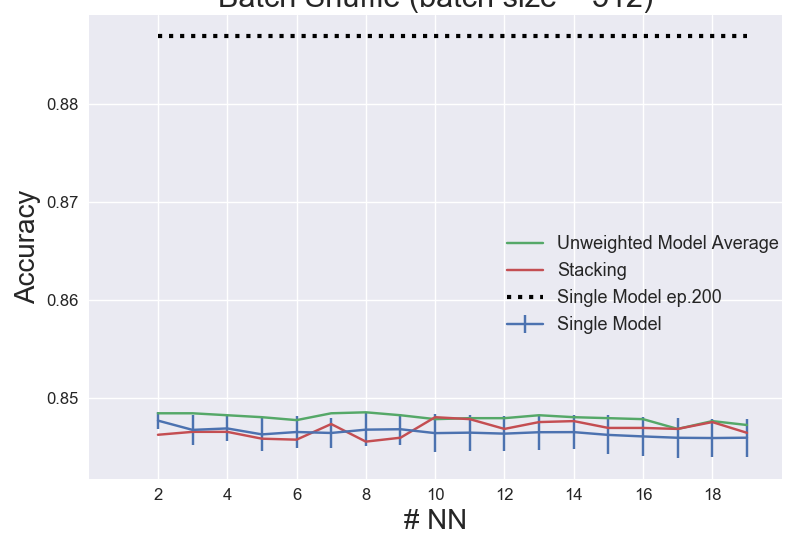

In [405]:
results['Mean Single Model Acc'].plot(yerr=results['Std Single Model Acc'], fontsize=12, fmt='', label='Single Model')
results['Mean Ensemble Acc'].plot(label='Unweighted Model Average')
results['Stacking Ensemble Acc'].plot(label='Stacking')
plt.plot(results.index,[0.887 for i in range(2,20)],color='black',lw=3,ls=':',label='Single Model ep.200')

plt.legend(prop={'size': 13}, loc=1, bbox_to_anchor=(1.02,0.56))
plt.xlabel('# NN',fontsize=20)
plt.xticks(np.arange(2, 20, 2))
plt.ylabel('Accuracy',fontsize=20)

plt.xlim([0,20])
plt.tight_layout()

plt.title('Batch Shuffle (batch size = 512)', fontsize=22)

plt.savefig('E:/Ensemble/BS512.png', bbox_inches="tight",dpi=300)

In [70]:
results2 = pd.read_excel('E:/Ensemble/only_distorted_riassunto.xlsx')
results2.set_index('# NN', inplace=True)

<IPython.core.display.Javascript object>


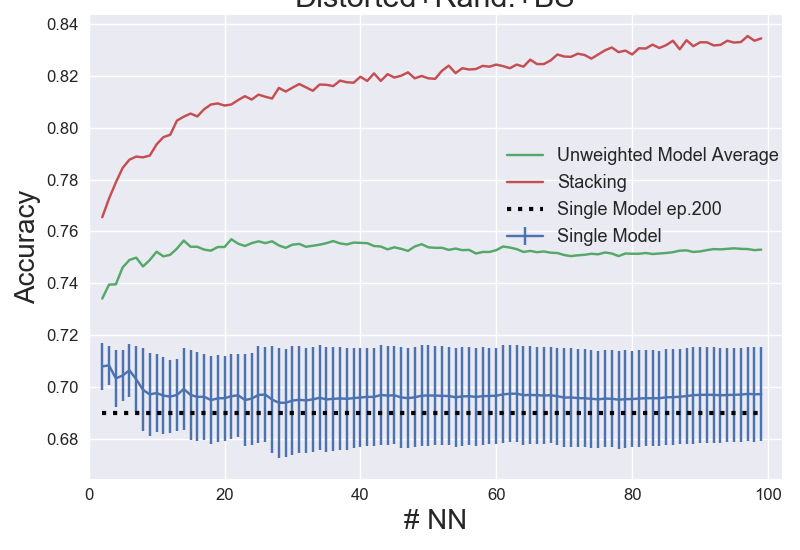

In [349]:
results2['Mean Single Model Acc'].plot(yerr=results2['Std Single Model Acc'], fontsize=12, fmt='', label='Single Model')
results2['Mean Ensemble Acc'].plot(label='Unweighted Model Average')
results2['Stacking Ensemble Acc'].plot(label='Stacking')
plt.plot(results2.index,[0.690 for i in range(98)],color='black',lw=3,ls=':',label='Single Model ep.200')

plt.legend(prop={'size': 13}, loc=1, bbox_to_anchor=(1.02,0.75))
plt.xlabel('# NN', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.xlim([0,102])
plt.tight_layout()

plt.title('Distorted+Rand.+BS', fontsize=22)

plt.savefig('E:/Ensemble/Distorted+Rand+BS.png', bbox_inches="tight",dpi=300)

In [2]:
results3 = pd.read_excel('E:/Ensemble/stacking_randInit_riassunto.xlsx')
results3.set_index('# NN', inplace=True)

<IPython.core.display.Javascript object>


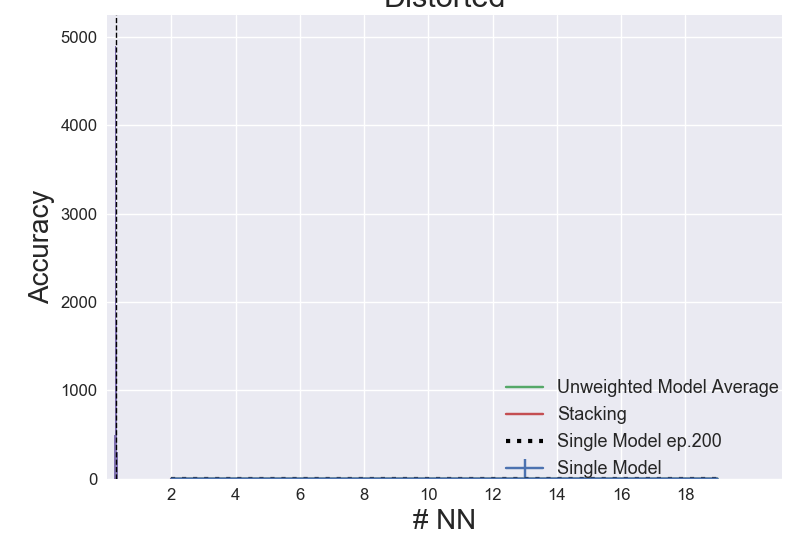

In [419]:
results4['Mean Single Model Acc'][:18].plot(yerr=results4['Std Single Model Acc'][:18], fontsize=12, fmt='', label='Single Model')
results4['Mean Ensemble Acc'][:18].plot(label='Unweighted Model Average')
results4['Stacking Ensemble Acc'][:18].plot(label='Stacking')
plt.plot(results4[:18].index,[0.89 for i in range(2,20)],color='black',lw=3,ls=':',label='Single Model ep.200')

plt.legend(prop={'size': 13}, loc=1, bbox_to_anchor=(1.02,0.25))
plt.xlabel('# NN',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)

plt.xticks(np.arange(2, 20, 2))

plt.xlim([0,21])
plt.tight_layout()

plt.title('Batch Shuffle (batch size 32)', fontsize=22)

plt.savefig('C:/Users/ftg/OneDrive/Desktop/TESI/inviati/Cap6/BS32.png', bbox_inches="tight",dpi=300)

In [409]:
results4['Mean Single Model Acc'][:18].shape

(18,)

In [406]:
results4 = pd.read_excel('E:/Ensemble/stacking_BS_riassunto.xlsx')
results4.set_index('# NN', inplace=True)

<IPython.core.display.Javascript object>


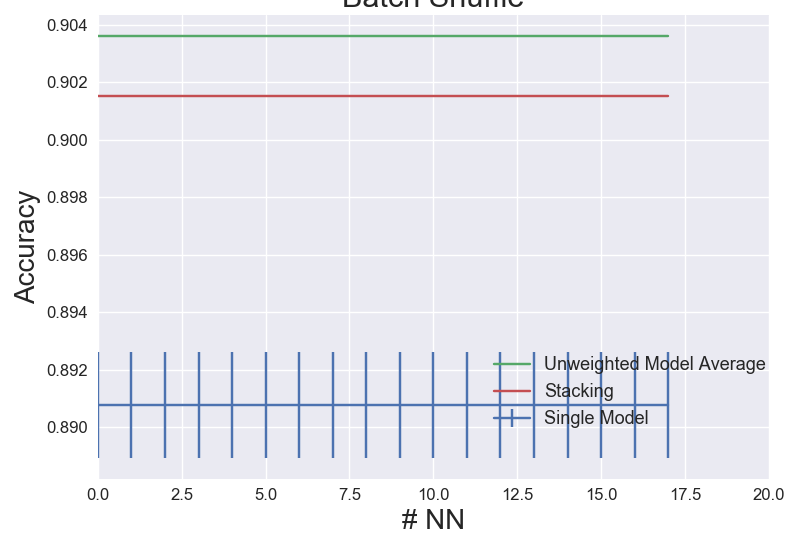

Text(0.5, 1, 'Batch Shuffle')

In [384]:
resultsBS8['Mean Single Model Acc'].plot(yerr=resultsBS8['Std Single Model Acc'], fontsize=12, fmt='', label='Single Model')
resultsBS8['Mean Ensemble Acc'].plot(label='Unweighted Model Average')
resultsBS8['Stacking Ensemble Acc'].plot(label='Stacking')

#plt.plot(results4.index,[0.890 for i in range(98)],color='black',lw=3,ls=':',label='Single Model ep.200')
plt.legend(prop={'size': 13}, loc=1, bbox_to_anchor=(1.02,0.3))
plt.xlabel('# NN', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.xlim([0,20])
plt.tight_layout()

plt.title('Batch Shuffle', fontsize=22)

#plt.savefig('E:/Ensemble/BatchShuffle.png', bbox_inches="tight",dpi=300)

In [375]:
num_NN = 20
model_dict = {}

for i in range(num_NN):
    model_dict[i] = load_model('D:/TESI MAGISTRALE/Batch Shuffle 8/epoca1-50/Checkpoint/model_NN'+str(i)+'_ep50.hdf5')

model_prediction = ModelsPrediction(X_train[48000:], model_dict, num_NN)
model_prediction_arr = np.array(model_prediction)
X_new = model_prediction_arr[0]
for i in range(num_NN):
    X_new = np.concatenate((X_new, model_prediction_arr[i]),axis=1)
model = Sequential([Dropout(0.2, input_dim=X_new.shape[1]),
                    Dense(100, activation='relu'),
                    Dropout(0.5),
                    Dense(num_classes, activation='softmax')])

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_new, y_train_dummy[48000:], validation_split=0.1,epochs=num_epochs,
         batch_size=b_size, shuffle=True)

model_prediction2 = ModelsPrediction(X_test, model_dict, num_NN)
model_prediction_arr2 = np.array(model_prediction2)
X_test_new = model_prediction_arr2[0]
for i in range(num_NN):
    X_test_new = np.concatenate((X_test_new, model_prediction_arr2[i]),axis=1)
stacking_ens_acc = model.evaluate(X_test_new, y_test_dummy)[1]
models_acc = np.zeros(num_NN)
for i in range(num_NN):
    models_acc[i] = (model_dict[i].evaluate(X_test,y_test_dummy)[1])
mean_sing_model_acc = models_acc.mean()
std_sing_model_acc = models_acc.std()

ens_pred= EnsemblePrediction(X_test, model_prediction2, num_NN)
mean_ens_acc = EnsembleAccuracy(X_test,y_test, ens_pred)
    
    


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Epoch 32/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.9032 - val_loss: 0.3067 - val_accuracy: 0.9050
Epoch 33/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.9043 - val_loss: 0.3076 - val_accuracy: 0.9058
Epoch 34/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.9070 - val_loss: 0.3076 - val_accuracy: 0.9058
Epoch 35/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8993 - val_loss: 0.3082 - val_accuracy: 0.9042
Epoch 36/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.9015 - val_loss: 0.3075 - val_accuracy: 0.9050
Epoch 37/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.9012 - val_loss: 0.3082 - val_accuracy: 0.9050
Epoch 38/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.9008 - val_loss: 0.3076 - val_accuracy:

Epoch 89/100
338/338 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.9042 - val_loss: 0.3002 - val_accuracy: 0.9067
Epoch 90/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.9070 - val_loss: 0.2995 - val_accuracy: 0.9083
Epoch 91/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.9036 - val_loss: 0.3011 - val_accuracy: 0.9075
Epoch 92/100
338/338 [==============================] - 2s 7ms/step - loss: 0.3333 - accuracy: 0.9060 - val_loss: 0.2998 - val_accuracy: 0.9083
Epoch 93/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.9040 - val_loss: 0.2998 - val_accuracy: 0.9067
Epoch 94/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.9088 - val_loss: 0.2991 - val_accuracy: 0.9067
Epoch 95/100
338/338 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.9068 - val_loss: 0.2994 - val_accuracy:

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8911
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experi

313/313 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.8914
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.8860
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribu

In [376]:
stacking_ens_acc

0.9014999866485596

In [377]:
mean_ens_acc

0.9036

In [378]:
mean_sing_model_acc

0.8907649993896485

In [379]:
std_sing_model_acc
    

0.0018306503696623893

In [380]:
resultsBS8 = pd.DataFrame()
resultsBS8['Epoca'] = [50 for i in range(num_NN-2)]
resultsBS8['# NN'] = [i for i in range(2,num_NN)]
resultsBS8['Mean Single Model Acc'] = mean_sing_model_acc
resultsBS8['Std Single Model Acc'] = std_sing_model_acc
resultsBS8['Mean Ensemble Acc'] = mean_ens_acc
resultsBS8['Stacking Ensemble Acc'] = stacking_ens_acc

In [21]:
results2

,Unnamed: 0,Epoca,Mean Single Model Acc,Std Single Model Acc,Mean Ensemble Acc,Stacking Ensemble Acc
# NN,,,,,,
2,0,50,0.707950,0.009150,0.7341,0.7655
3,1,50,0.708333,0.007491,0.7395,0.7727
4,2,50,0.703300,0.010867,0.7396,0.7789
5,3,50,0.704420,0.009974,0.7461,0.7845
6,4,50,0.706433,0.010157,0.7490,0.7877
...,...,...,...,...,...,...
95,93,50,0.696996,0.018201,0.7535,0.8329
96,94,50,0.697044,0.018112,0.7533,0.8331
97,95,50,0.697345,0.018259,0.7532,0.8354


In [22]:
from sklearn.linear_model import LinearRegression
x=np.array(results2[20:].index)
x=x.reshape(-1,1)
y=np.array(results2['Stacking Ensemble Acc'][20:])
y=y.reshape(-1,1)
reg = LinearRegression().fit(x, y)

In [71]:
x=np.array(results2.index)
#x=x.reshape(-1,1)
y=np.array(results2['Stacking Ensemble Acc'])
#y=y.reshape(-1,1)

log_fit = np.polyfit(np.log(x), y, 1)
log_fit

"""
regressor = LinearRegression()
results = regressor.fit(x, y)                
model = results.predict
y_fit = model(x)
"""

'\nregressor = LinearRegression()\nresults = regressor.fit(x, y)                \nmodel = results.predict\ny_fit = model(x)\n'

In [53]:
log_fit

array([-6.38119847e-06,  1.09834381e-03,  7.83956702e-01])

In [372]:
reg.intercept_

array([0.7951238])

<IPython.core.display.Javascript object>


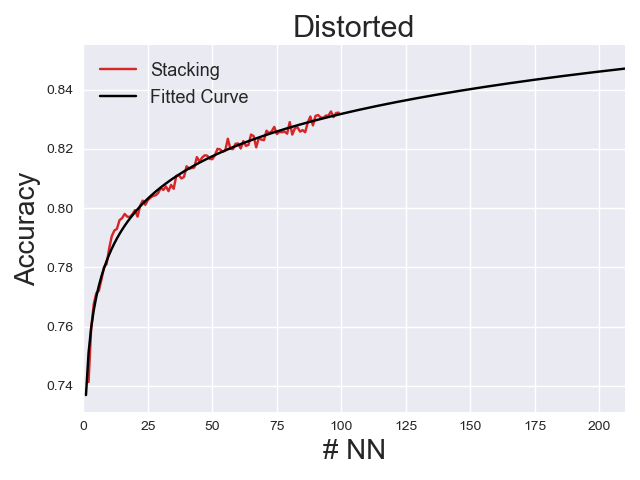

C:\Users\ftg\Anaconda3\envs\Python3.6FTG\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [75]:
#results2['Mean Single Model Acc'].plot(yerr=results2['Std Single Model Acc'], fontsize=12, fmt='', label='Single Model')
#results2['Mean Ensemble Acc'].plot(label='Unweighted Model Average')
results2['Stacking Ensemble Acc'].plot(label='Stacking',color='tab:red')
#plt.plot(results2.index,[0.690 for i in range(98)],color='black',lw=3,ls=':',label='Single Model ep.200')

x = np.array([i for i in range(0,235)]).reshape(-1,1)
plt.plot(x, log_fit[0]*np.log(x)+log_fit[1], 'black', label="Fitted Curve")
#plt.plot(x, fit_equation,label='Logaritmic fit',color='black')

plt.legend(prop={'size': 13}, loc=0)
plt.xlabel('# NN', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

plt.title("Distorted", fontsize=22)
plt.xlim([0,210])
plt.tight_layout()

#plt.savefig('C:/Users/ftg/OneDrive/Desktop/TESI/inviati/Cap5/distorted regression.png', bbox_inches="tight",dpi=300)

In [73]:
np.exp((0.89-log_fit[1])/log_fit[0])

1685.5961223483275

In [67]:
log_fit[0]*np.log(2952)+log_fit[1]

0.8900015684036766

In [446]:
# dod vs ID
num_NN=20

path1 = 'D:/TESI MAGISTRALE/Batch Shuffle 8/epoca1-50/Checkpoint'
path2 = 'D:/TESI MAGISTRALE/Batch Shuffle 32/epoca1-200/Checkpoint'
path3 = 'D:/TESI MAGISTRALE/Batch Shuffle 512/epoca1-50/Checkpoint'
path4 = 'D:/TESI MAGISTRALE/Rand Init/epoca1-200/Checkpoint'
path5 = 'E:/Ensemble/Immagini distorte/solo distorsione/epoca1-200/Checkpoint'
path6 = 'E:/Fonti di Variazione/Random+Shuffle/Checkpoint'
path7 = 'E:/Ensemble/Immagini distorte/epoca1-200/Checkpoint'
path8 = 'D:/TESI MAGISTRALE/Drop0.4/epoca1-50/Checkpoint'
path9 = 'D:/TESI MAGISTRALE/Full model/Checkpoint'

lista_path = [path1, path2, path3, path4, path5, path6, path7, path8, path9]

dod_mean_np = np.zeros(len(lista_path))
dod_std_np = np.zeros(len(lista_path))


for p,path in enumerate(lista_path):
    model_dict = {}
    for i in range(num_NN):
        model_dict[i] = load_model(path+'/model_NN'+str(i)+'_ep50.hdf5')

    model_prediction = ModelsPrediction(X_test, model_dict, num_NN)
    DoD, error = DegreeOfDisagreement(X_test, model_prediction, num_NN)
    DoD_l = DoD_lista(DoD,num_NN)
    dod_mean_np[p] = np.array(DoD_l).mean()
    dod_std_np[p] = np.array(DoD_l).std()
    
dod_results = pd.DataFrame()
dod_results['Ensemble'] = ['Batch Shuffle 8', 'Batch Shuffle 32', 'Batch Shuffle 512', 'Rand. Init.',
                          'Distorted', 'Rand. Init. + BS', 'Distorted + Rand. + BS', 'Dropout', 'Full model', ]
dod_results['DoD mean'] = dod_mean_np
dod_results['DoD std'] = dod_std_np

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [447]:
dod_results

,Enemble,DoD mean,DoD std
0,Batch Shuffle 8,0.066059,0.004879
1,Batch Shuffle 32,0.059547,0.012779
2,Batch Shuffle 512,0.028631,0.010557
3,Rand. Init.,0.047381,0.002182
4,Distorted,0.259178,0.024901
5,Rand. Init. + BS,0.072662,0.010426
6,Distorted + Rand. + BS,0.270471,0.021174
7,Dropout,0.024308,0.002314
8,Full model,0.040015,0.006654


In [448]:
dod_results.to_excel('E:/DOD_riassunto.xlsx')

In [132]:
DoD_l = DoD_lista(DoD,num_NN)

In [133]:
DoD_mean = np.array(DoD_l).mean()

<IPython.core.display.Javascript object>


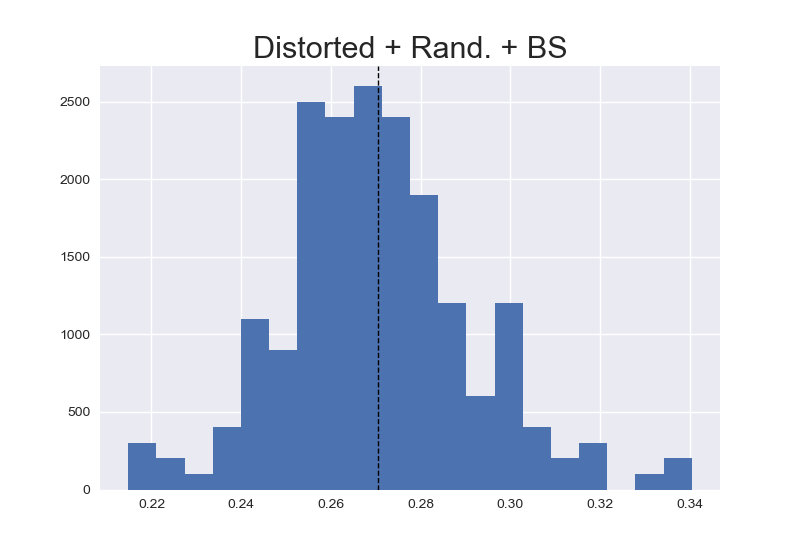

In [426]:
plt.hist(DoD_l*100,bins=20)
plt.axvline(dod_mean_np, color='k', linestyle='dashed', linewidth=1)
plt.title('Distorted + Rand. + BS', fontsize=22);

In [135]:
plt.savefig('C:/Users/ftg/OneDrive/Desktop/TESI/inviati/Cap6/DoD_Distorted.png', bbox_inches="tight",dpi=300)

In [164]:
path1 = 'D:/TESI MAGISTRALE/Batch Shuffle 32/epoca1-200/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path2 = 'D:/TESI MAGISTRALE/Drop0.4/epoca1-50/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path3 = 'D:/TESI MAGISTRALE/Rand Init/epoca1-200/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path4 = 'E:/Fonti di Variazione/Random+Shuffle/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path5 = 'D:/TESI MAGISTRALE/Full model/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path6 = 'E:/Ensemble/Immagini distorte/epoca1-200/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path7 = 'E:/Ensemble/Immagini distorte/solo distorsione/epoca1-200/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path8 = 'D:/TESI MAGISTRALE/Batch Shuffle 8/epoca1-50/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'
path9 = 'D:/TESI MAGISTRALE/Batch Shuffle 512/epoca1-50/Checkpoint/model_NN'+str(i)+'_ep50.hdf5'

lista_path = [path1, path2, path3, path4, path5, path6]
for j,path in enumerate(lista_path):
    print(j,path)

0 D:/TESI MAGISTRALE/Batch Shuffle 32/epoca1-200/Checkpoint/model_NN+str(i)+_ep50.hdf5
1 D:/TESI MAGISTRALE/Drop0.4/epoca1-50/Checkpoint/model_NN4_ep50.hdf5
2 D:/TESI MAGISTRALE/Rand Init/epoca1-200/Checkpoint/model_NN4_ep50.hdf5
3 E:/Fonti di Variazione/Random+Shuffle/Checkpoint/model_NN4_ep50.hdf5
4 D:/TESI MAGISTRALE/Full model/Checkpoint/model_NN4_ep50.hdf5
5 E:/Ensemble/Immagini distorte/epoca1-200/Checkpoint/model_NN4_ep50.hdf5


In [479]:
model_dict = {}
num_NN=20
for i in range(num_NN):
    model_dict[i] = load_model('D:/TESI MAGISTRALE/Full model/Checkpoint/model_NN'+str(i)+'_ep50.hdf5')

model_prediction = ModelsPrediction(X_test, model_dict, num_NN)
DoD, error = DegreeOfDisagreement(X_test, model_prediction, num_NN)
DoD_l = DoD_lista(DoD,num_NN)
dod_mean_np = np.array(DoD_l).mean()
dod_std_np = np.array(DoD_l).std()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [421]:
dod_mean_np

0.27047105263157895

<IPython.core.display.Javascript object>


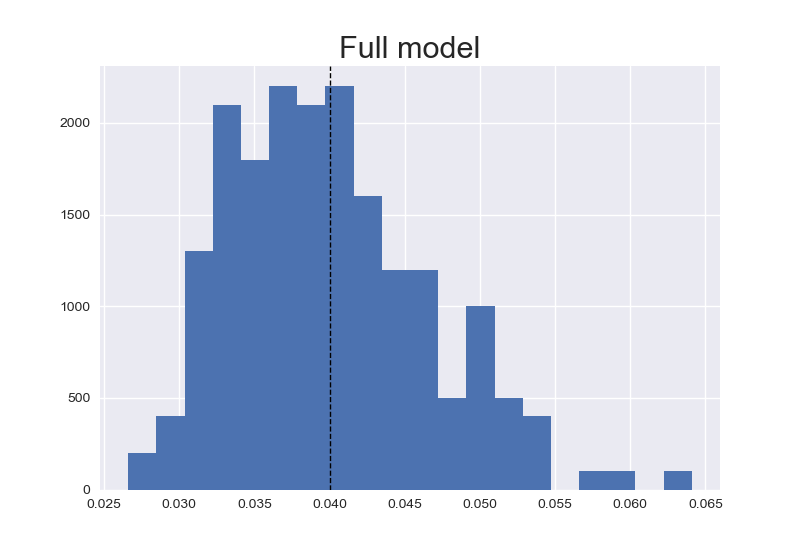

In [480]:
plt.hist(DoD_l*100,bins=20)
plt.axvline(dod_mean_np, color='k', linestyle='dashed', linewidth=1)
plt.title('Full model', fontsize=22);

In [189]:
dod_results = pd.DataFrame()
dod_results['Enemble'] = ['Batch Shuffle', 'Dropout', 'Rand. Init.', 'Rand. Init. + BS', 'Full model', 'Distorted']
dod_results['DoD mean'] = [0.00571, 0.0248, 0.0480, 0.0695, 0.0387, 0.2612]
dod_results['DoD std'] = [0.0125, 0.0025, 0.0024, 0.010, 0.006, 0.0026]
dod_results['ID'] = [48, 538, 6766, 6524, 5821, 4400]
dod_results.to_excel('E:/DoD_riassunto.xlsx')

In [190]:
dod_results['Estimated ']

,Enemble,DoD mean,DoD std,ID
0,Batch Shuffle,0.00571,0.0125,48
1,Dropout,0.02480,0.0025,538
2,Rand. Init.,0.04800,0.0024,6766
3,Rand. Init. + BS,0.06950,0.0100,6524
4,Full model,0.03870,0.0060,5821
5,Distorted,0.26120,0.0026,4400


<IPython.core.display.Javascript object>


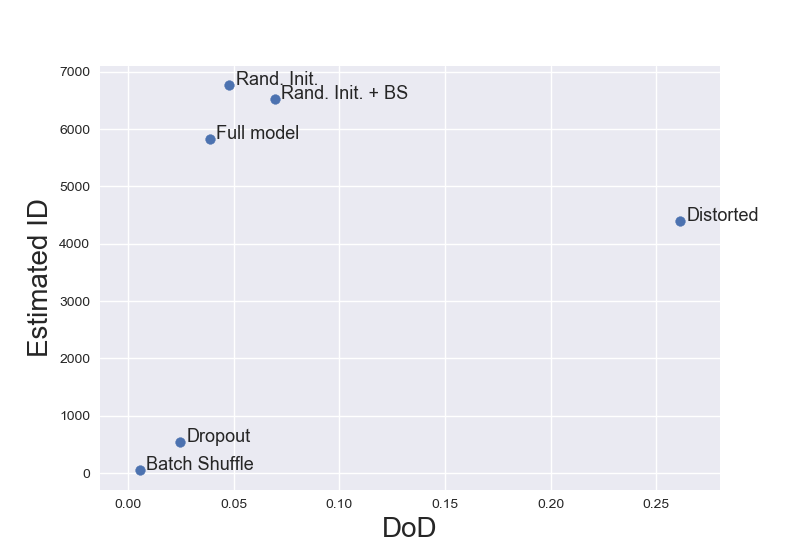

In [203]:
fig, ax = plt.subplots()
ax.scatter(dod_results['DoD mean'], dod_results['ID'])
ax.set_xlabel('DoD', fontsize=20)
ax.set_ylabel('Estimated ID', fontsize=20)
for i, txt in enumerate(dod_results['Enemble']):
    ax.annotate(txt, (dod_results['DoD mean'][i]+0.003, dod_results['ID'][i]), fontsize=13)

In [449]:
model04 = load_model('E:/Fonti di Variazione/drop0.4(NN0 ep 1-200)/Checkpoint/model_NN0_ep150.hdf5')
model04.evaluate(X_test,y_test_dummy)[1]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8822


0.8822000026702881

In [450]:
DOP_riassunto = pd.read_excel('E:/DOP_riassunto.xlsx')

In [451]:
DOP_riassunto

,Unnamed: 0,Ensemble,DOP mean,DOP std,Estimated ID,Stacking,Single model ep.200,Increased accuray
0,0,Batch Shuffle 8,0.066059,0.004879,261,0.9024,0.897900,1.005012
1,1,Batch Shuffle 32,0.059547,0.012779,48,0.8925,0.890000,1.002809
2,2,Batch Shuffle 512,0.028631,0.010557,15,0.8464,0.887500,0.953690
3,3,Rand. Init.,0.047381,0.002182,6766,0.8898,0.886000,1.004289
4,4,Distorted,0.259178,0.024901,1889,0.7979,0.680933,1.171775
5,5,Rand. Init. + BS,0.072662,0.010426,6524,0.8967,0.892000,1.005269
6,6,Distorted + Rand. + BS,0.270471,0.021174,4345,0.8094,0.689610,1.173707
7,7,Dropout,0.024308,0.002314,538,0.8687,0.882200,0.984697
8,8,Full model,0.040015,0.006654,5821,0.8571,0.873404,0.981333


In [8]:
import mplcursors

<IPython.core.display.Javascript object>


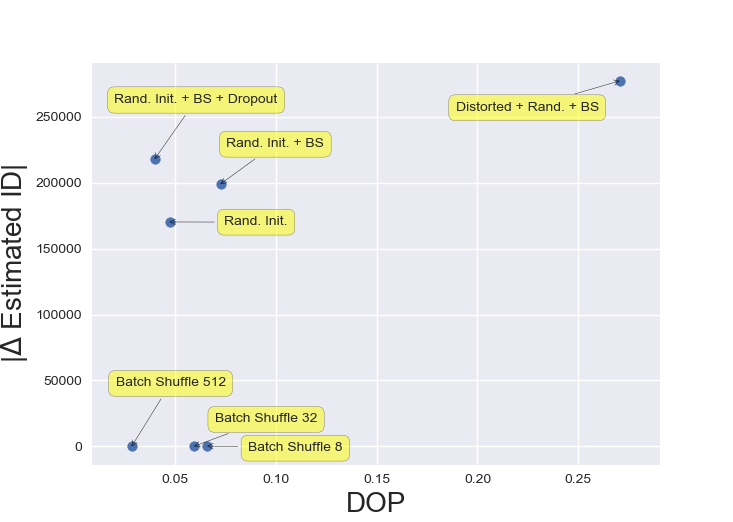

<function __main__.<lambda>(sel)>

In [22]:
fig, ax = plt.subplots()
ax.scatter(DOP_riscalato['DOP mean'], DOP_riscalato['variazione riscalata'])
ax.set_xlabel('DOP', fontsize=20)
ax.set_ylabel('|$\Delta$ Estimated ID|', fontsize=20)
"""
for i, txt in enumerate(DOP_riassunto['Ensemble'][:-2]):
    ax.annotate(txt, (DOP_riassunto['DOP mean'][i]+0.003, DOP_riassunto['Estimated ID'][i]), fontsize=13)
"""
#ax.set_yscale('log')
mplcursors.cursor(multiple = True).connect(
    "add", lambda sel: sel.annotation.set_text(
          DOP_riscalato['Ensemble'][sel.target.index]
))

In [21]:
my_rho = np.corrcoef(DOP_riscalato['Increased accuracy'], DOP_riscalato['variazione riscalata'])

In [22]:
my_rho

array([[1.        , 0.59122488],
       [0.59122488, 1.        ]])

In [463]:
DOP_riassunto2 = pd.read_excel('E:/DOP_riassunto.xlsx')

In [465]:
DOP_riassunto2.drop([3,5,6,8],inplace=True)

In [486]:
my_rho2 = np.corrcoef(DOP_riassunto2['Increased accuray'], DOP_riassunto2['Estimated ID'])

In [487]:
my_rho2

array([[1.        , 0.95038635],
       [0.95038635, 1.        ]])

In [472]:
DOP_riassunto2['index'] =[0,1,2,3,4]
DOP_riassunto2.set_index('index',inplace=True)

In [12]:
DOP_rand = pd.read_excel('E:/DOP_riassunto.xlsx')

In [7]:
DOP_rand.drop([0,1,2,4,7],inplace=True)

In [13]:
DOP_rand

,Unnamed: 0,Unnamed: 0.1,Ensemble,DOP mean,DOP std,Estimated ID,Stacking,Single model ep.200,Increased accuracy,ID iniziale,variazione ID,variazione riscalata
0,0,0,Batch Shuffle 8,0.066059,0.004879,261,0.9024,0.897900,1.005012,0,261,261.000000
1,1,1,Batch Shuffle 32,0.059547,0.012779,48,0.8925,0.890000,1.002809,0,48,48.000000
2,2,2,Batch Shuffle 512,0.028631,0.010557,15,0.8464,0.887500,0.953690,0,15,15.000000
3,3,3,Rand. Init.,0.047381,0.002182,6766,0.8898,0.886000,1.004289,10625,3859,170294.310400
4,4,4,Distorted,0.259178,0.024901,1889,0.7979,0.680933,1.171775,0,1889,1889.000000
5,5,5,Rand. Init. + BS,0.072662,0.010426,6524,0.8967,0.892000,1.005269,11339,4815,199102.097187
6,6,6,Distorted + Rand. + BS,0.270471,0.021174,4345,0.8094,0.689610,1.173707,10637,6292,277348.426060
7,7,7,Dropout,0.024308,0.002314,538,0.8687,0.882200,0.984697,0,538,538.000000
8,8,8,Full model,0.040015,0.006654,5821,0.8571,0.873404,0.981333,10882,5061,218064.000000


In [11]:
DOP_rand['index'] =[0,1,2,3]
DOP_rand.set_index('index',inplace=True)

ValueError: Length of values does not match length of index

In [499]:
my_rho3 = np.corrcoef(DOP_rand['DOP mean'], DOP_rand['Estimated ID'])

In [500]:
my_rho3

array([[ 1.        , -0.90002643],
       [-0.90002643,  1.        ]])

In [504]:
DOP_riassunto['ID iniziale'] = [0, 0, 0, 10625, 0, 11339, 10637, 0, 10882]

In [506]:
a = abs(DOP_riassunto['ID iniziale'] - DOP_riassunto['Estimated ID'])
a

0     261
1      48
2      15
3    3859
4    1889
5    4815
6    6292
7     538
8    5061
dtype: int64

In [507]:
DOP_riassunto['variazione ID'] = abs(DOP_riassunto['ID iniziale'] - DOP_riassunto['Estimated ID'])

In [531]:
DOP_riassunto = pd.read_excel('E:/DOP_riassunto.xlsx')

In [532]:
DOP_riassunto

,Unnamed: 0,Unnamed: 0.1,Ensemble,DOP mean,DOP std,Estimated ID,Stacking,Single model ep.200,Increased accuray,ID iniziale,variazione ID,variazione riscalata
0,0,0,Batch Shuffle 8,0.066059,0.004879,261,0.9024,0.897900,1.005012,0,261,261.000000
1,1,1,Batch Shuffle 32,0.059547,0.012779,48,0.8925,0.890000,1.002809,0,48,48.000000
2,2,2,Batch Shuffle 512,0.028631,0.010557,15,0.8464,0.887500,0.953690,0,15,15.000000
3,3,3,Rand. Init.,0.047381,0.002182,6766,0.8898,0.886000,1.004289,10625,3859,170294.310400
4,4,4,Distorted,0.259178,0.024901,1889,0.7979,0.680933,1.171775,0,1889,1889.000000
5,5,5,Rand. Init. + BS,0.072662,0.010426,6524,0.8967,0.892000,1.005269,11339,4815,199102.097187
6,6,6,Distorted + Rand. + BS,0.270471,0.021174,4345,0.8094,0.689610,1.173707,10637,6292,277348.426060
7,7,7,Dropout,0.024308,0.002314,538,0.8687,0.882200,0.984697,0,538,538.000000
8,8,8,Full model,0.040015,0.006654,5821,0.8571,0.873404,0.981333,10882,5061,218064.000000


In [20]:
DOP_riscalato = pd.read_excel('E:/DOP_riassunto.xlsx')
DOP_riscalato.drop([4,7], inplace =True)
DOP_riscalato['index'] = [0,1,2,3,4,5,6]
DOP_riscalato.set_index('index',inplace=True)

In [15]:
DOP_riscalato

,Unnamed: 0,Unnamed: 0.1,Ensemble,DOP mean,DOP std,Estimated ID,Stacking,Single model ep.200,Increased accuracy,ID iniziale,variazione ID,variazione riscalata
index,,,,,,,,,,,,
0,0,0,Batch Shuffle 8,0.066059,0.004879,261,0.9024,0.897900,1.005012,0,261,261.000000
1,1,1,Batch Shuffle 32,0.059547,0.012779,48,0.8925,0.890000,1.002809,0,48,48.000000
2,2,2,Batch Shuffle 512,0.028631,0.010557,15,0.8464,0.887500,0.953690,0,15,15.000000
3,3,3,Rand. Init.,0.047381,0.002182,6766,0.8898,0.886000,1.004289,10625,3859,170294.310400
4,5,5,Rand. Init. + BS,0.072662,0.010426,6524,0.8967,0.892000,1.005269,11339,4815,199102.097187
5,6,6,Distorted + Rand. + BS,0.270471,0.021174,4345,0.8094,0.689610,1.173707,10637,6292,277348.426060
6,8,8,Full model,0.040015,0.006654,5821,0.8571,0.873404,0.981333,10882,5061,218064.000000


In [6]:
DOP_riscalato = pd.read_excel('E:/DOP_riassunto.xlsx')